In [1]:
#Import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
np.random.seed(100) # to ensure the reproducibility of the models

In [2]:
GHG = pd.read_csv('Gas.csv')

In [3]:
GHG.head()


,Date,Treatment,Cashcrop,Rep,Ccspecies,CO2,N2O,Tsoil,SoilM,Tmax,Tmin,Tair,PPTwk,Irr,Cinput
0,11/20/2018,Fallow,corn,1,NO,0.993,-74.905,9.2,22.8,11.67,-5.56,3.055,0.0,0.0,0.0
1,11/20/2018,Fallow,corn,2,NO,0.659,-87.666,7.6,23.6,11.67,-5.56,3.055,0.0,0.0,0.0
2,11/20/2018,Fallow,corn,3,NO,1.632,-81.519,9.6,16.2,11.67,-5.56,3.055,0.0,0.0,0.0
3,11/20/2018,Fallow,corn,4,NO,12.150,21.458,10.6,27.7,11.67,-5.56,3.055,0.0,0.0,0.0
4,12/5/2018,Fallow,corn,1,NO,0.000,19.092,10.7,16.1,7.22,-6.11,0.555,0.0,0.0,0.0


In [4]:
#Correlation
GHGcor =GHG.drop(['Date', 'Treatment', 'Cashcrop', 'Rep'], axis =1)
GHGcor.head()


,Ccspecies,CO2,N2O,Tsoil,SoilM,Tmax,Tmin,Tair,PPTwk,Irr,Cinput
0,NO,0.993,-74.905,9.2,22.8,11.67,-5.56,3.055,0.0,0.0,0.0
1,NO,0.659,-87.666,7.6,23.6,11.67,-5.56,3.055,0.0,0.0,0.0
2,NO,1.632,-81.519,9.6,16.2,11.67,-5.56,3.055,0.0,0.0,0.0
3,NO,12.150,21.458,10.6,27.7,11.67,-5.56,3.055,0.0,0.0,0.0
4,NO,0.000,19.092,10.7,16.1,7.22,-6.11,0.555,0.0,0.0,0.0


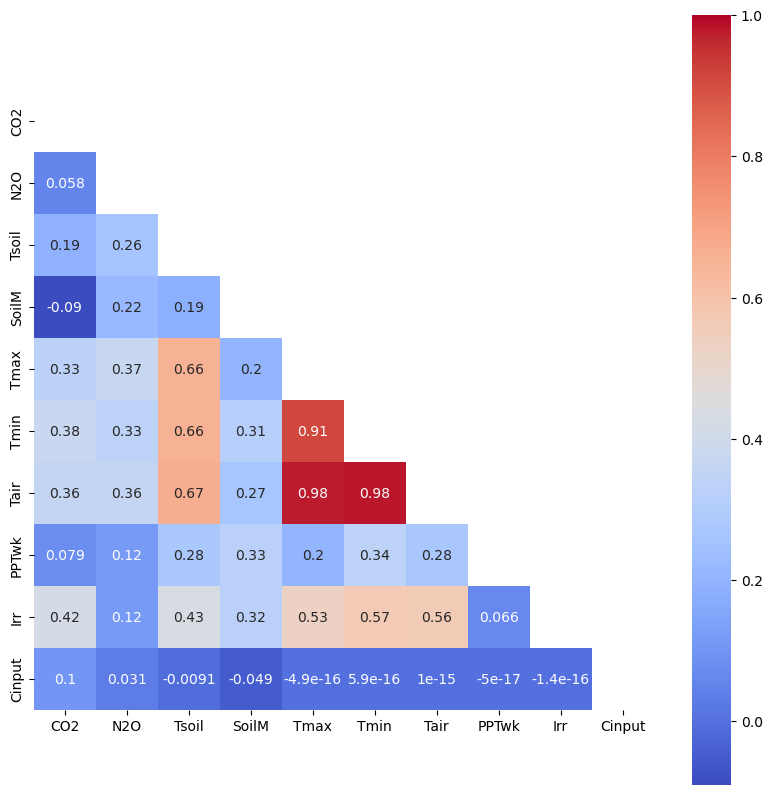

In [5]:
#Create correlation matrix
import seaborn as sns
cmat=GHGcor.corr(numeric_only = True)
fig =plt.figure(figsize =(10,10))
mask = np.triu(np.ones_like(cmat, dtype =bool))

sns.heatmap(cmat, annot = True, vmax =1, mask = mask, square =True, cmap = 'coolwarm')
plt.show()


In [6]:
#Select treatment-eg.Fallow
GHGFallow = GHG[GHG['Treatment']=='Fallow']
GHGFallow.head()


,Date,Treatment,Cashcrop,Rep,Ccspecies,CO2,N2O,Tsoil,SoilM,Tmax,Tmin,Tair,PPTwk,Irr,Cinput
0,11/20/2018,Fallow,corn,1,NO,0.993,-74.905,9.2,22.8,11.67,-5.56,3.055,0.0,0.0,0.0
1,11/20/2018,Fallow,corn,2,NO,0.659,-87.666,7.6,23.6,11.67,-5.56,3.055,0.0,0.0,0.0
2,11/20/2018,Fallow,corn,3,NO,1.632,-81.519,9.6,16.2,11.67,-5.56,3.055,0.0,0.0,0.0
3,11/20/2018,Fallow,corn,4,NO,12.150,21.458,10.6,27.7,11.67,-5.56,3.055,0.0,0.0,0.0
4,12/5/2018,Fallow,corn,1,NO,0.000,19.092,10.7,16.1,7.22,-6.11,0.555,0.0,0.0,0.0


In [7]:
#Select the input featurs 
X= GHGFallow.loc[:,['Tsoil', 'SoilM', 'Tair', 'PPTwk', 'Irr', 'Cinput']]

In [8]:
#Select the output feature. eg. N2O/CO2
Y = GHGFallow.loc[:,['N2O']]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2, random_state = 100)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
Y_train = np.ravel(Y_train)


In [10]:
##Comparing multiple models

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



In [11]:
#create object for each modelusing the tuned-hyperparameters 
rf= RandomForestRegressor(random_state =100, 
                          criterion= 'squared_error',
                          max_depth= 27,
                          max_features= None, 
                          min_samples_leaf= 0.0006367789927585795, 
                          min_samples_split= 0.06193709629430012, 
                          n_estimators= 100) 





                          
gb = GradientBoostingRegressor(random_state =100, 
                               criterion= 'friedman_mse',
                               learning_rate= 0.1,
                               loss= 'huber',
                               max_depth=10,
                               max_features= 'sqrt', 
                               min_samples_leaf= 0.03453310100276703, 
                               min_samples_split= 0.0007481275830341083, 
                               n_estimators= 40)



bg = BaggingRegressor(random_state =100)

dt = DecisionTreeRegressor(random_state =100,
                          criterion= 'squared_error',
                           max_depth= 10,
                           max_features= None,
                           min_samples_leaf= 0.00772390922804083,
                           min_samples_split= 0.18531303497551405,
                           splitter= 'best')



xgb = XGBRegressor(random_state =100,
                 eta= 0.01,
                 max_depth= 3, 
                n_estimators= 900)



In [12]:
#Fitting randomforestmodel
rf.fit(X_train, Y_train)
Y_predict_rf = rf.predict (X_test)
r2_score(Y_test, Y_predict_rf)

train_data_score_rf = rf.score(X_train, Y_train)
test_data_score_rf = rf.score(X_test, Y_test)




In [13]:
#Creating results for prediction
Y_train_predict_rf= rf.predict(X_train)
Y_test_predict_rf = rf.predict(X_test)
Y_test = np.ravel(Y_test)


In [14]:
##Fitting gradient boosting
gb.fit(X_train, Y_train)
Y_predict_gb = gb.predict (X_test)
r2_score(Y_test, Y_predict_gb)
train_data_score_gb = gb.score(X_train, Y_train)
test_data_score_gb = gb.score(X_test, Y_test)



In [15]:
#Creating results for prediction
Y_train_predict_gb = gb.predict(X_train)
Y_test_predict_gb = gb.predict(X_test)
Y_test = np.ravel(Y_test)


In [16]:
#Fitting the model for bagging regressor
bg.fit(X_train, Y_train)
Y_predict_bg = bg.predict (X_test)
r2_score(Y_test, Y_predict_bg)
train_data_score_bg = bg.score(X_train, Y_train)
test_data_score_bg = bg.score(X_test, Y_test)


In [17]:
#Creating results for prediction
Y_train_predict_bg = bg.predict(X_train)
Y_test_predict_bg = bg.predict(X_test)
Y_test = np.ravel(Y_test)


In [18]:
#Fitting extreme gradient boosting
xgb.fit(X_train,Y_train)
Y_predict_xgb = xgb.predict (X_test)
r2_score(Y_test, Y_predict_xgb)
train_data_score_xgb = xgb.score(X_train, Y_train)
test_data_score_xgb = xgb.score(X_test, Y_test)



In [19]:
#Creating results for prediction
Y_train_predict_xgb = xgb.predict(X_train)
Y_test_predict_xgb = xgb.predict(X_test)
Y_test = np.ravel(Y_test)


In [20]:
#Fitting Decision tree
dt.fit(X_train,Y_train)
Y_predict_dt = dt.predict (X_test)
r2_score(Y_test, Y_predict_dt)
train_data_score_dt = dt.score(X_train, Y_train)
test_data_score_dt = dt.score(X_test, Y_test)


In [21]:
#Creating results for prediction
Y_train_predict_dt = dt.predict(X_train)
Y_test_predict_dt = dt.predict(X_test)
Y_test = np.ravel(Y_test)


In [22]:
#Evaluation of training using Random Forest model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of training is = % 2f' % mean_absolute_error (Y_train, Y_train_predict_rf) )
print('The MSE of training is = % 2f' % mean_squared_error (Y_train, Y_train_predict_rf) )
print('The r2 of training is = % 2f' % r2_score(Y_train, Y_train_predict_rf) )
print ('The RMSE of training is = % 2f' % np.sqrt( mean_absolute_error (Y_train, Y_train_predict_rf)) )


The MAE of training is =  20.458599
The MSE of training is =  655.361940
The r2 of training is =  0.607685
The RMSE of training is =  4.523118


In [23]:
##Evaluation of test using Random Forest model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of testing is = % 2f' % mean_absolute_error (Y_test, Y_test_predict_rf) )
print('The MSE of testing  is = % 2f' % mean_squared_error (Y_test, Y_test_predict_rf) )
print('The r2 of testing  is = % 2f' % r2_score(Y_test, Y_test_predict_rf) )
print('The RMSE of testing  is = % 2f' % np.sqrt( mean_absolute_error (Y_test, Y_test_predict_rf)) )


The MAE of testing is =  23.934397
The MSE of testing  is =  834.181770
The r2 of testing  is =  0.556522
The RMSE of testing  is =  4.892279


In [24]:
##Evaluation of training using Gradient Boosting model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of training is = % 2f' % mean_absolute_error (Y_train, Y_train_predict_gb) )
print('The MSE of training is = % 2f' % mean_squared_error (Y_train, Y_train_predict_gb) )
print('The r2 of training is = % 2f' % r2_score(Y_train, Y_train_predict_gb) )
print ('The RMSE of training is = % 2f' % np.sqrt( mean_absolute_error (Y_train, Y_train_predict_gb)) )


The MAE of training is =  17.589622
The MSE of training is =  523.405733
The r2 of training is =  0.686677
The RMSE of training is =  4.193998


In [25]:
##Evaluation of test using Gradient Boosting model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of testing is = % 2f' % mean_absolute_error (Y_test, Y_test_predict_gb) )
print('The MSE of testing is = % 2f' % mean_squared_error (Y_test, Y_test_predict_gb) )
print('The r2 of testing is = % 2f' % r2_score(Y_test, Y_test_predict_gb) )
print('The RMSE of testing is = % 2f' % np.sqrt( mean_absolute_error (Y_test, Y_test_predict_gb)) )


The MAE of testing is =  23.743827
The MSE of testing is =  847.153956
The r2 of testing is =  0.549626
The RMSE of testing is =  4.872764


In [26]:
##Evaluation of training using Bagging Regressor model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of training is = % 2f' % mean_absolute_error (Y_train, Y_train_predict_bg) )
print('The MSE of training is = % 2f' % mean_squared_error (Y_train, Y_train_predict_bg) )
print('The r2 of training is = % 2f' % r2_score(Y_train, Y_train_predict_bg) )
print ('The RMSE of training is = % 2f' % np.sqrt( mean_absolute_error (Y_train, Y_train_predict_bg)) )


The MAE of training is =  10.126462
The MSE of training is =  179.149072
The r2 of training is =  0.892757
The RMSE of training is =  3.182210


In [27]:
##Evaluation of test using Bagging Regressor model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of testing is = % 2f' % mean_absolute_error (Y_test, Y_test_predict_bg) )
print('The MSE of testing is = % 2f' % mean_squared_error (Y_test, Y_test_predict_bg) )
print('The r2 of testing is = % 2f' % r2_score(Y_test, Y_test_predict_bg) )
print('The RMSE of testing is = % 2f' % np.sqrt( mean_absolute_error (Y_test, Y_test_predict_bg)) )


The MAE of testing is =  25.928042
The MSE of testing is =  1046.750125
The r2 of testing is =  0.443514
The RMSE of testing is =  5.091959


In [28]:
##Evaluation of training using Extreme Gradient Boosting model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of training is = % 2f' % mean_absolute_error (Y_train, Y_train_predict_xgb) )
print('The MSE of training is = % 2f' % mean_squared_error (Y_train, Y_train_predict_xgb) )
print('The r2 of training is = % 2f' % r2_score(Y_train, Y_train_predict_xgb) )
print ('The RMSE of training is = % 2f' % np.sqrt( mean_absolute_error (Y_train, Y_train_predict_xgb)) )


The MAE of training is =  18.508039
The MSE of training is =  558.828703
The r2 of training is =  0.665472
The RMSE of training is =  4.302097


In [29]:
##Evaluation of test using Extreme Gradient Boosting model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of testing is = % 2f' % mean_absolute_error (Y_test, Y_test_predict_xgb) )
print('The MSE of testing is = % 2f' % mean_squared_error (Y_test, Y_test_predict_xgb) )
print('The r2 of testing is = % 2f' % r2_score(Y_test, Y_test_predict_xgb) )
print('The RMSE of testing is = % 2f' % np.sqrt( mean_absolute_error (Y_test, Y_test_predict_xgb)) )


The MAE of testing is =  25.973541
The MSE of testing is =  1022.178481
The r2 of testing is =  0.456577
The RMSE of testing is =  5.096424


In [30]:
##Evaluation of training using Decision Tree model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of training is = % 2f' % mean_absolute_error (Y_train, Y_train_predict_dt) )
print('The MSE of training is = % 2f' % mean_squared_error (Y_train, Y_train_predict_dt) )
print('The r2 of training is = % 2f' % r2_score(Y_train, Y_train_predict_dt) )
print ('The RMSE of training is = % 2f' % np.sqrt( mean_absolute_error (Y_train, Y_train_predict_dt)) )


The MAE of training is =  24.487509
The MSE of training is =  905.704545
The r2 of training is =  0.457825
The RMSE of training is =  4.948486


In [31]:
##Evaluation of test using Decision Tree model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('The MAE of testing is = % 2f' % mean_absolute_error (Y_test, Y_test_predict_dt) )
print('The MSE of testing is = % 2f' % mean_squared_error (Y_test, Y_test_predict_dt) )
print('The r2 of testing is = % 2f' % r2_score(Y_test, Y_test_predict_dt) )
print('The RMSE of testing is = % 2f' % np.sqrt( mean_absolute_error (Y_test, Y_test_predict_dt)) )


The MAE of testing is =  27.252083
The MSE of testing is =  1104.509075
The r2 of testing is =  0.412807
The RMSE of testing is =  5.220353


In [32]:
#To get the same result set the seed
seed = 100
# Feature Ranking
import pandas as pd
from sklearn.pipeline import Pipeline
#To resolve the error message 
Y_test = np.ravel(Y_test)
#Feature importances 


In [33]:
#feature list 
f_list =list(X.columns)
f_importance = pd.Series(gb.feature_importances_, index = f_list).sort_values(ascending=False)
f_importance = f_importance*100
f_importance


Tair      40.937493
SoilM     18.027796
Tsoil     16.180412
PPTwk     15.725514
Irr        9.128784
Cinput     0.000000
dtype: float64

(0.0, 130.0)

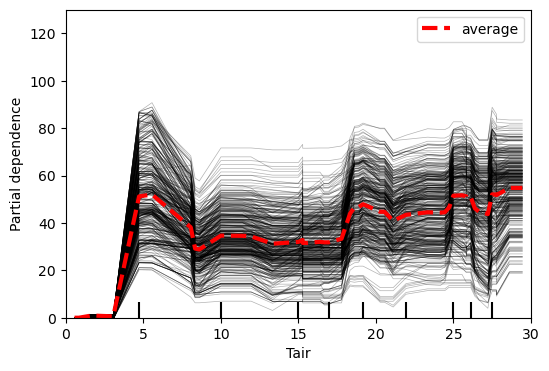

In [34]:
#Plotting the partial dependent plot and ICE plots
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

fix, ax = plt.subplots (nrows= 1, ncols = 1, figsize=(6,4))
PartialDependenceDisplay.from_estimator(gb, X, ['Tair'], 
                                         kind='both',
                                         centered =True,
                                         ice_lines_kw = {'color': 'black'},
                                         pd_line_kw= {'color': 'red', 'lw':3, 'linestyle': '--'},
                                       ax = ax)

plt.xlim(0,30)
plt.ylim(0,130)
